<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Customer-Behavior-Analysis--and-Prediction" data-toc-modified-id="Customer-Behavior-Analysis--and-Prediction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Customer Behavior Analysis  and Prediction</a></span><ul class="toc-item"><li><span><a href="#Project-Overview" data-toc-modified-id="Project-Overview-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Project Overview</a></span><ul class="toc-item"><li><span><a href="#Objective" data-toc-modified-id="Objective-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Objective</a></span></li><li><span><a href="#Variables-in-the-dataset" data-toc-modified-id="Variables-in-the-dataset-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Variables in the dataset</a></span></li></ul></li><li><span><a href="#Data-Wrangling" data-toc-modified-id="Data-Wrangling-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Data Wrangling</a></span><ul class="toc-item"><li><span><a href="#Load-the-Customer-Data" data-toc-modified-id="Load-the-Customer-Data-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Load the Customer Data</a></span></li><li><span><a href="#Explore-the-Data" data-toc-modified-id="Explore-the-Data-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Explore the Data</a></span></li></ul></li></ul></li></ul></div>

# Customer Behavior Analysis  and Prediction
## Project Overview
### Objective
Investigate if the customer would accept an offer from marketing champaign or not and make predictions

### Variables in the dataset
***
a. Customer information
 - Year_Birth: Customer's birth year
 - Education: Customer's education level
 - Marital_Status: Customer's marital status
 - Income: Customer's yearly household income
 - Kidhome: Number of children in customer's household
 - Teenhome: Number of teenagers in customer's household
 - Dt_Customer: Date of customer's enrollment with the company
 - Complain: if the customer complained in the last 2 years
***
b. Amount spent on each category in last 2 years
 - MntWines: Amount spent on wine
 - MntFruits: Amount spent on fruits
 - MntMeatProducts: Amount spent on meat
 - MntFishProducts: Amount spent on fish
 - MntSweetProducts: Amount spent on sweets
 - MntGoldProds: Amount spent on gold
***
c. Places where customers make the purchase
 - NumWebPurchases: Number of purchases made through the company’s website
 - NumCatalogPurchases: Number of purchases made using a catalog
 - NumStorePurchases: Number of purchases made directly in stores
 - NumWebVisitsMonth: Number of visits to company’s website in the last month
***
d. Promotion activities response
 - NumDealsPurchases: Number of purchases made with a discount
 - AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
 - AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
 - AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
 - AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
 - AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
 - Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

## Data Wrangling

This step focuses on importing data, organizing, and cleaning to make sure data's well defined.

### Load the Customer Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from datetime import datetime, date, timedelta
from library.sb_utils import save_file

In [3]:
df = pd.read_csv('marketing_campaign.csv', sep='\t')

In [4]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
df.info() # no null values; Dtype: 3 object (categorical); Dt_Customer need to be parsed as date time. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
# summary
#df.describe()

### Explore the Data

 -  Categorical Variables 

In [7]:
def bar_plot(variable):
    """
        input: variable ex: "Eduacation"
        output: histogram & value count
    """
    # get feature
    var = df[variable]
    # count the number of categorical variable
    varValue = var.value_counts()                                
    
    # visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)                           
    plt.xticks(varValue.index, varValue.index.values)             
    plt.ylabel("Count")
    plt.title(variable)
    
    plt.show()

    print("{}: \n{}".format(variable,varValue))

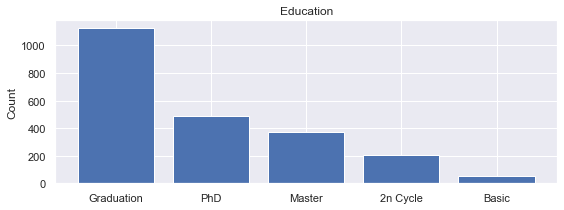

Education: 
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64


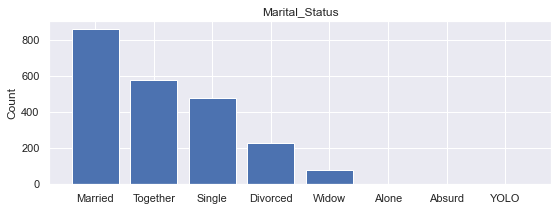

Marital_Status: 
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64


In [8]:
sns.set()
category = ["Education","Marital_Status"]
for c in category :
    bar_plot(c)

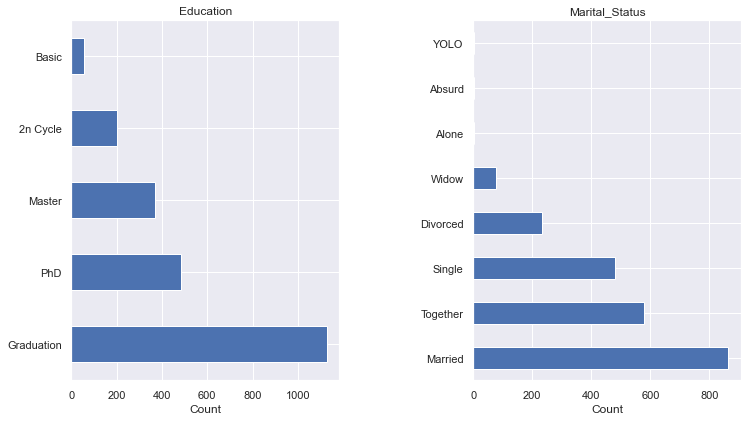

In [9]:
#Create two subplots on 1 row and 2 columns with a figsize of (12, 8)
fig, ax = plt.subplots(1, 2, figsize=(12,10))
#Specify a horizontal barplot ('barh') as kind of plot (kind=)
df.Education.value_counts().plot(kind='barh', ax=ax[0])
ax[0].set_title('Education')
ax[0].set_xlabel('Count')

df.Marital_Status.value_counts().plot(kind='barh', ax=ax[1])
ax[1].set_title('Marital_Status')
ax[1].set_xlabel('Count')

#Give the subplots a little "breathing room" with a wspace of 0.5
plt.subplots_adjust(bottom=0.3, top=0.8, wspace=0.5, hspace=0);
# keep the square figure size but put more margin around the subplots

 - Date Time Variable

In [10]:
df['Dt_Customer']= pd.to_datetime(df.Dt_Customer)

In [11]:
# create a new feature 'year'
df['Year'] = pd.to_datetime(df.Dt_Customer).dt.year

 - Numeric Features

In [12]:
# create a new feature 'Age' 
df['Age'] = 2022 - df.Year_Birth

In [13]:
def hist_plot(variable):
    plt.figure(figsize = (7,4))
    plt.hist(df[variable], bins = 100, density=True)  
    
    plt.xlabel(variable)
    plt.ylabel("Count")
    plt.title("Histogram of {} distribution".format(variable))
    plt.show()

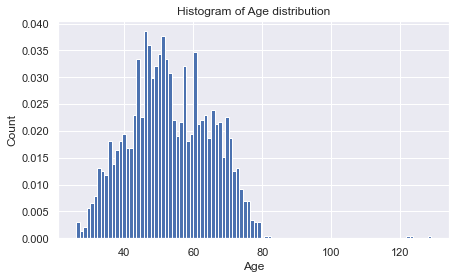

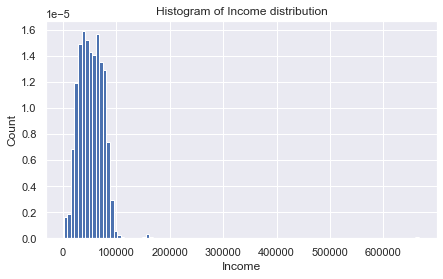

In [14]:
numericVar = ["Age", "Income"]
for n in numericVar:
    hist_plot(n)

 - Organize columns and Create New Features
 <br>
 Look at the customer features closely and re-organize them into new categories.

In [15]:
# Organize Education
df['Edu'] = df.Education.replace({"Basic":"Undergrad","2n Cycle":"Undergrad", 
                                            "Graduation":"Grad", "Master":"Postgrad",
                                             "PhD":"Postgrad"})

In [16]:
df['Household'] = df.Marital_Status.replace({"Married":"couple","Together":"couple",
                                             "Absurd":"single","Widow":"single",
                                             "YOLO":"single","Divorced":"single", "Single":"single"})

In [17]:
# rename columns
df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat",
                     "MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"}, inplace=True)

In [18]:
# number of days customer enrolled 
df['Days_Enrolled'] = datetime.today() - df.Dt_Customer

In [19]:
# exrtact days from timedelta; https://stackoverflow.com/questions/31283001/get-total-number-of-hours-from-a-pandas-timedelta
df['Days_Enrolled'] = df.Days_Enrolled.dt.days

In [20]:
df['total_spent'] = df.Wines + df.Fruits + df.Meat + df.Fish + df.Sweets + df.Gold

In [21]:
df['Age_group'] = pd.cut(df.Age, [20,30,40,50,60,70,80,90],
                         labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90'])

In [22]:
byage = df.groupby(['Age_group', 'Edu']).total_spent.mean()

In [23]:
byage

Age_group  Edu      
20-30      Grad          981.941176
           Postgrad     1159.000000
           Undergrad     463.666667
30-40      Grad          527.174419
           Postgrad      811.086022
           Undergrad     291.490566
40-50      Grad          543.241692
           Postgrad      530.342466
           Undergrad     304.096154
50-60      Grad          624.181818
           Postgrad      595.080645
           Undergrad     570.300000
60-70      Grad          713.020161
           Postgrad      681.234973
           Undergrad     593.690476
70-80      Grad          794.112903
           Postgrad      767.416667
           Undergrad     875.714286
80-90      Grad                 NaN
           Postgrad     1138.000000
           Undergrad            NaN
Name: total_spent, dtype: float64

In [24]:
bins_edges = [20, 30, 40, 50, 60, 70, 80, 90]

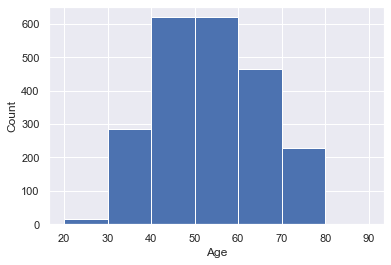

In [25]:
plt.hist(df.Age, bins=bins_edges)
plt.xlabel('Age')
plt.ylabel('Count');

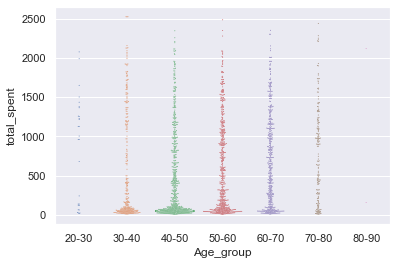

In [26]:
sns.swarmplot(x='Age_group', y='total_spent', data=df, size=0.9);

In [27]:
# def plot_timeseries(axes, x, y, color, xlabel, ylabel):
#   axes.plot(x,y,color=color)
#    axes.xlabel = xlabel
#    axes.ylabel = ylabel
#    axes.tick_params('y', colors=color)
#fig, ax =plt.subplots()
#plot_timeseries(ax, df.Dt_Customer, df.Age, 'red', 'x', 'y')

In [28]:
spent = pd.melt(df[['Age_group', 'Wines', 'Fruits', 'Meat', 'Fish',
       'Sweets', 'Gold']], id_vars='Age_group', var_name='Shopping_list', value_vars=['Wines', 'Fruits', 'Meat', 'Fish',
       'Sweets', 'Gold'], value_name='Expense')

In [29]:
spent.head()

,Age_group,Shopping_list,Expense
0,60-70,Wines,635
1,60-70,Wines,11
2,50-60,Wines,426
3,30-40,Wines,11
4,40-50,Wines,173


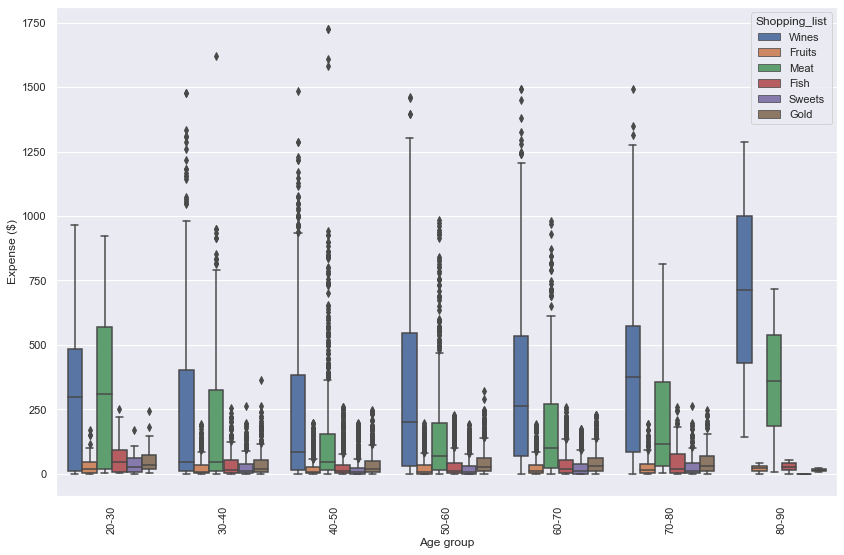

In [30]:
sns.set()
plt.subplots(figsize=(14, 9))
sns.boxplot(x='Age_group', y='Expense', hue='Shopping_list', data=spent)
plt.xticks(rotation='vertical')
plt.ylabel('Expense ($)')
plt.xlabel('Age group');

In [31]:
age_spent_mean = df.groupby(['Age_group']).mean()

In [32]:
age_spent_mean[['Wines', 'Fruits', 'Meat', 'Fish',
       'Sweets', 'Gold']] # young people spend more on meat and senior people spend more on wines...

,Wines,Fruits,Meat,Fish,Sweets,Gold
Age_group,,,,,,
20-30,308.785714,39.035714,314.321429,67.214286,39.821429,58.821429
30-40,250.635220,28.345912,183.078616,37.053459,28.808176,43.003145
40-50,241.923547,22.545872,141.108563,32.940367,24.050459,38.324159
50-60,320.434188,26.157265,154.627350,35.437607,25.856410,45.647863
60-70,364.854123,27.560254,180.801268,40.942918,28.824524,47.143763
70-80,406.853107,31.271186,211.237288,48.468927,32.700565,50.519774
80-90,714.500000,21.000000,361.500000,27.500000,0.000000,13.500000


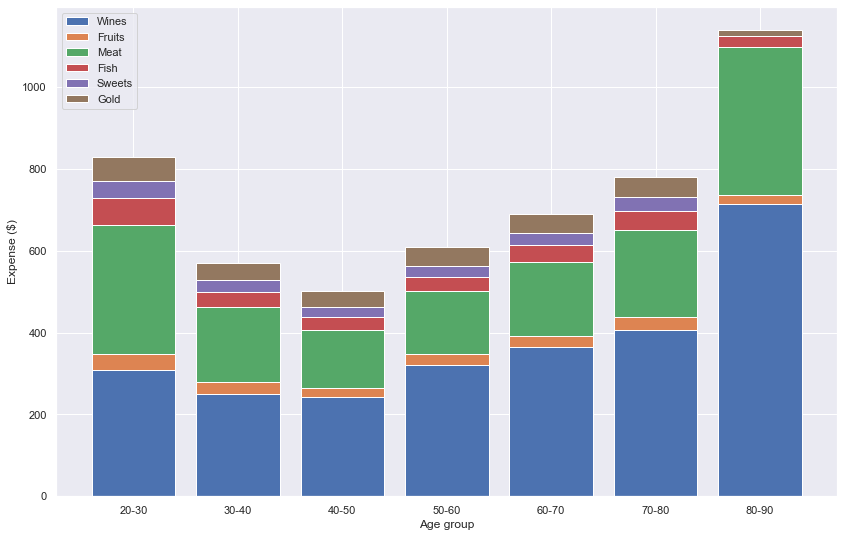

In [33]:
import matplotlib.ticker as mticker

fig, ax = plt.subplots(figsize=(14,9))
ax.bar(age_spent_mean.index, age_spent_mean['Wines'], label='Wines')
ax.bar(age_spent_mean.index, age_spent_mean['Fruits'], bottom=age_spent_mean['Wines'], label='Fruits')
ax.bar(age_spent_mean.index, age_spent_mean['Meat'], bottom=age_spent_mean['Wines'] + age_spent_mean['Fruits'], label='Meat')
ax.bar(age_spent_mean.index, age_spent_mean['Fish'], bottom=age_spent_mean['Wines'] + age_spent_mean['Fruits'] 
       + age_spent_mean['Meat'], label='Fish')
ax.bar(age_spent_mean.index, age_spent_mean['Sweets'], bottom=age_spent_mean['Wines'] + age_spent_mean['Fruits'] 
       + age_spent_mean['Meat'] + age_spent_mean['Fish'], label='Sweets')
ax.bar(age_spent_mean.index, age_spent_mean['Gold'], bottom=age_spent_mean['Wines'] + age_spent_mean['Fruits'] 
       + age_spent_mean['Meat'] + age_spent_mean['Fish'] + age_spent_mean['Sweets'], label='Gold')

#ax.set_xticklabels(age_spent_mean.index, rotation=90)
ax.set_xlabel('Age group')
ax.set_ylabel('Expense ($)')
ax.legend();

The figure above gives us a sense how the average expenses vary from young people to senior people as the following:
* Young people spend more on food (meat and fish) and senior people spend more on wines (less on sweets). 
* Middle-aged people spend the least who often need save money to pay mortgage and other bills. 

In [34]:
df['Children'] = df.Kidhome + df.Teenhome

In [35]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish',
       'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Year', 'Age', 'Edu', 'Household', 'Days_Enrolled', 'total_spent',
       'Age_group', 'Children'],
      dtype='object')

 - Drop columns

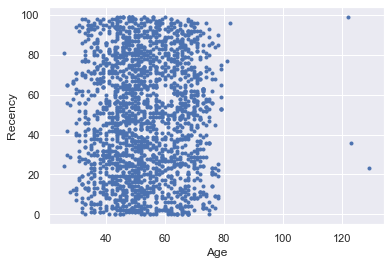

In [36]:
_= plt.scatter(x=df.Age, y=df.Recency, marker='.', linestyle='None')
_= plt.xlabel('Age')
_= plt.ylabel('Recency')

In [37]:
# df.Z_Revenue.max() # min/max= 11 
# df.Z_CostContact.value_counts() #3    2240    Name: Z_CostContact, dtype: int64
# To_Drop = ['ID', 'Year_Birth', 'Education', 'Marital_Status','Kidhome',
#       'Teenhome', 'Dt_Customer', 'Recency', 'Z_CostContact', 'Z_Revenue', inplace=True]